In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
data=pd.read_csv("Armenian Market Car Prices.csv")
data.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


In [90]:
data.describe()

,Year,Mileage,Price
count,7995.000000,7995.000000,7995.000000
mean,2010.342089,146401.523327,15555.002877
std,9.113848,108371.306576,17731.598604
min,1943.000000,10.000000,200.000000
25%,2004.000000,60000.000000,6000.000000
50%,2011.000000,130000.000000,11500.000000
75%,2018.000000,210000.000000,19000.000000
max,2024.000000,1000000.000000,565000.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car Name  7995 non-null   object
 1   Year      7995 non-null   int64 
 2   Region    7995 non-null   object
 3   FuelType  7995 non-null   object
 4   Mileage   7995 non-null   int64 
 5   Price     7995 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 374.9+ KB


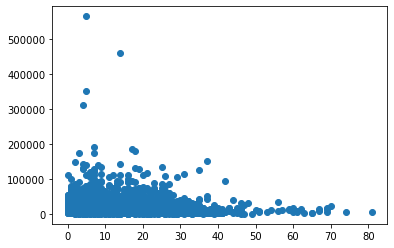

In [92]:
d=data.copy()
d["Age"]=2024-d['Year']

plt.scatter(d["Age"],d["Price"])

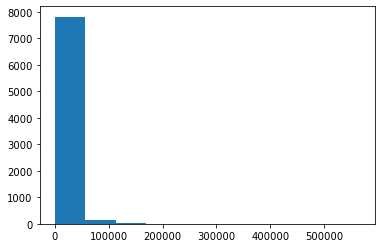

In [93]:
plt.hist(data["Price"])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

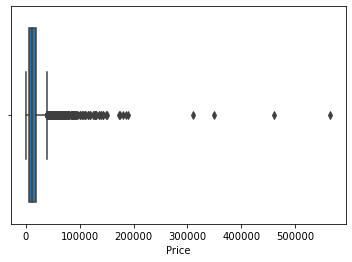

In [94]:
sns.boxplot(data["Price"])

<Figure size 1296x864 with 0 Axes>

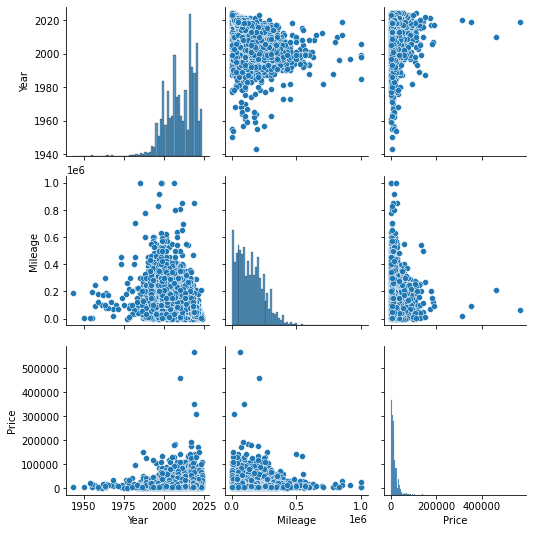

In [95]:
plt.figure(figsize=(18,12))
sns.pairplot(data)
plt.show()

<AxesSubplot:>

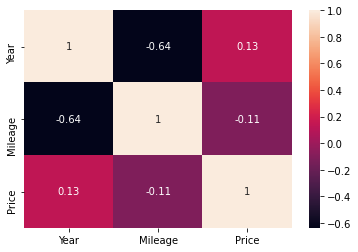

In [96]:
sns.heatmap(data.corr(),annot=True)

In [97]:
le=LabelEncoder()
data["Car Name"]=le.fit_transform(data["Car Name"])
data["Region"]=le.fit_transform(data["Region"])
data["FuelType"]=le.fit_transform(data["FuelType"])
data.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,188,2002,71,0,215000,12000
1,174,2017,82,2,72000,11500
2,568,1998,24,2,466000,4000
3,376,2020,133,2,100000,22000
4,568,1998,24,2,318000,3500


In [98]:
df=data.copy()
ss=StandardScaler()
df["Year"]=ss.fit_transform(df[["Year"]])
df["Mileage"]=ss.fit_transform(df[["Mileage"]])
df["Price"]=ss.fit_transform(df[["Price"]])
df

,Car Name,Year,Region,FuelType,Mileage,Price
0,188,-0.915377,71,0,0.633034,-0.200502
1,174,0.730573,82,2,-0.686586,-0.228702
2,568,-1.354297,24,2,2.949291,-0.651702
3,376,1.059763,133,2,-0.428198,0.363498
4,568,-1.354297,24,2,1.583530,-0.679902
...,...,...,...,...,...,...
7990,720,0.291653,24,2,0.033207,1.096698
7991,653,0.840303,133,2,-0.483567,-0.561462
7992,555,-1.025107,5,2,0.042435,-0.324582
7993,662,-0.147267,161,2,1.417424,-0.623502


In [99]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [101]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_mse=mean_squared_error(y_test,lr_pred)
lr_mae=mean_absolute_error(y_test,lr_pred)
print("MSE:",lr_mse)
print("MAE:",lr_mae)

MSE: 0.9395201452001174
MAE: 0.5446653787117627


In [102]:
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
dr_pred=dr.predict(X_test)
dr_mse=mean_squared_error(y_test,dr_pred)
dr_mae=mean_absolute_error(y_test,dr_pred)
print("MSE:",dr_mse)
print("MAE:",dr_mae)

MSE: 1.9097753552850782
MAE: 0.8008268459953649


In [103]:
rf=RandomForestRegressor(min_samples_split=8,min_samples_leaf=8)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_mse=mean_squared_error(y_test,rf_pred)
rf_mae=mean_absolute_error(y_test,rf_pred)
print("MSE:",rf_mse)
print("MAE:",rf_mae)

MSE: 0.9463980245561591
MAE: 0.5434231879750869


In [ ]:
svc=SVR()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
svc_mse=mean_squared_error(y_test,svc_pred)
svc_mae=mean_absolute_error(y_test,svc_pred)
print("MSE:",svc_mse)
print("MAE:",svc_mae)